**Dataset Contents:**

The dataset contains information about 418 passengers aboard the Titanic. It includes the following columns -

PassengerId: A unique identifier for each passenger.

Survived: Indicates whether the passenger survived (1) or not (0).

Pclass: The passenger's class (1st, 2nd, or 3rd).

Name: The passenger's name.

Sex: The gender of the passenger.

Age: The age of the passenger.

SibSp: The number of siblings/spouses aboard.

Parch: The number of parents/children aboard.

Ticket: The ticket number.

Fare: The fare paid for the ticket.

Cabin: The cabin number where the passenger stayed.

Embarked: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).

In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading Dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/tested.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#Checking if there are any missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Imputing Values in Age and Fare by Mean of the them
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Age'].mean())

In [9]:
# Dropping Cabin Field as maximum no. of fields in it has missing values
data = df.drop(['Cabin'], axis =1, inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
# Dropping Fields which do not play role in survival of a person like PassengerId, Name, Ticket
data = df.drop(['PassengerId','Name','Ticket'], axis =1, inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


<Axes: >

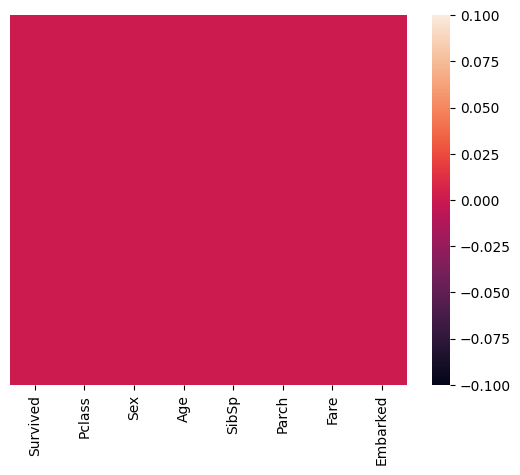

In [13]:
sns.heatmap(df.isnull(),yticklabels=False)

# **Data Visualization**

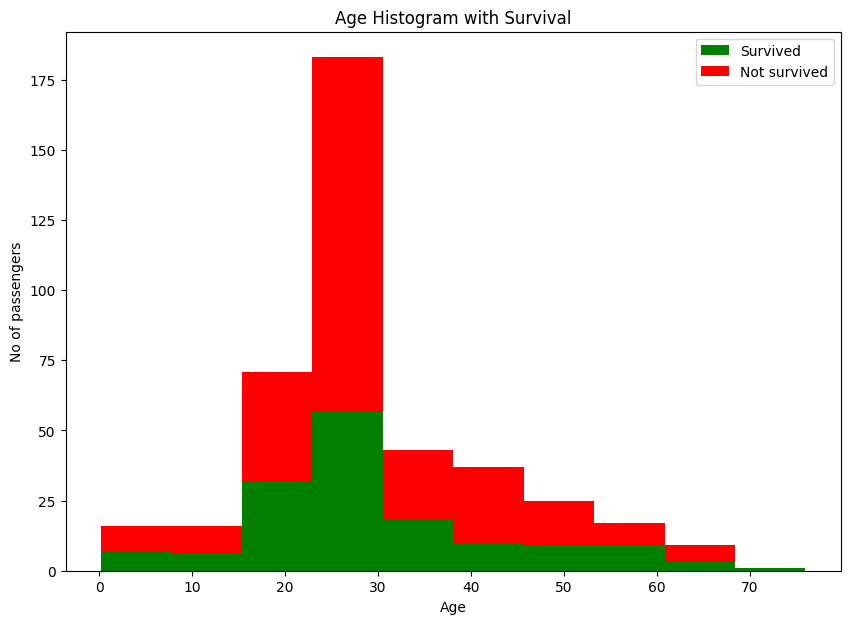

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

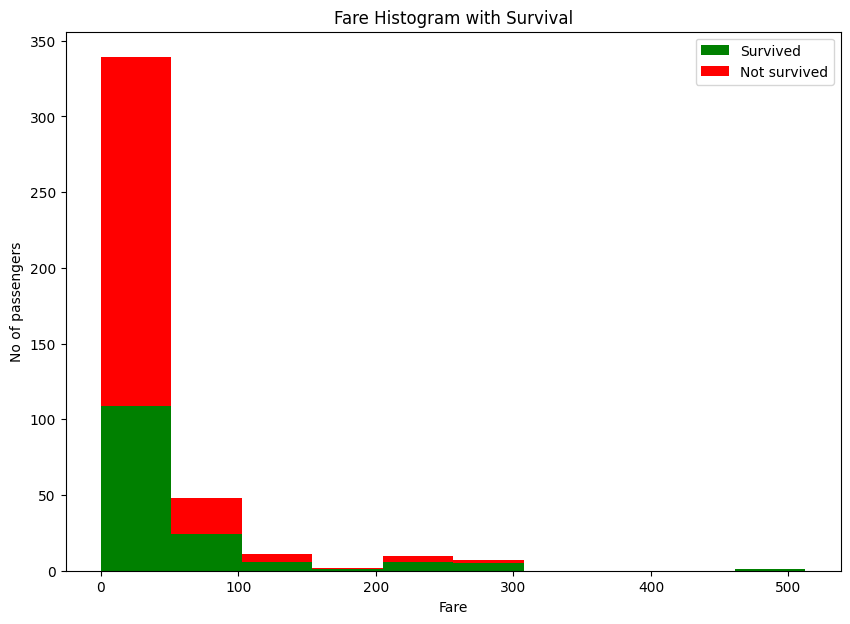

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

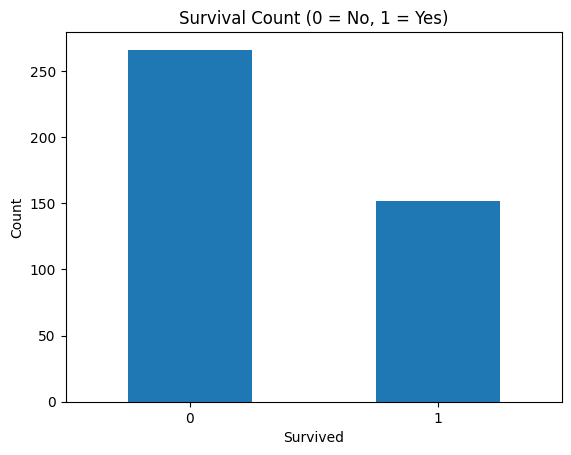

In [16]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

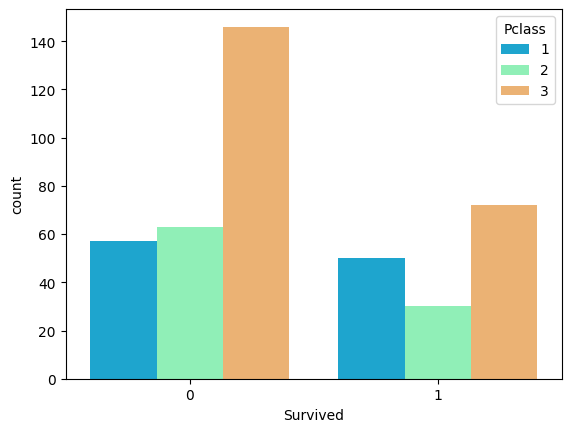

In [17]:
import seaborn as sns
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
# Changing DataTypes of Columns
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [20]:
# asigning values to object datatype(simply strings) with the help of dictionary
df['Embarked'] = df['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

# **Model Selection**

In [21]:
#Spliting Data into Training and Testing Part
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [22]:
#Logistic Regression
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 94.05%


In [23]:
#Decision Tree
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
DTAcc = accuracy_score(y_test,y_pred)
print('Decision Tree accuracy:{:.2f}%'.format(DTAcc*100))

Decision Tree accuracy:100.00%


In [27]:
#Random Forest
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
RFAcc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(RFAcc*100))

Random Forest Accuracy: 100.00%


## Clearly We can see that Accuracy of Decision Tree and Random Forest comes out to be 100%(i.e. Highest). So, Random Forest Classifier is most suitable for Predicting because in decision tree it may be because of overfitting.